# DATA LOADING AND PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Cod_Soft/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df["Class"].unique()


array([0, 1])

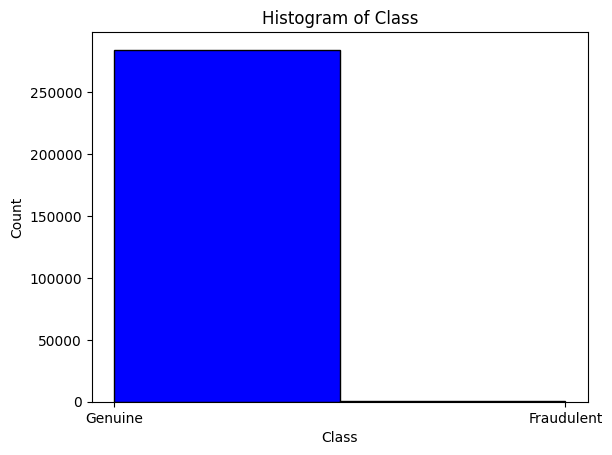

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a 'Class' column
# df['Class'] contains the class labels (0 for genuine, 1 for fraudulent)

# Create a histogram
plt.hist(df['Class'], bins=2, edgecolor='k', color=['blue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Class')
plt.xticks([0, 1], ['Genuine', 'Fraudulent'])
plt.show()


In [ ]:
# Determine number of fraud cases in DataFrame df
fraud = df[df['Class'] == 1]  # Select rows where 'Class' is 1 (fraudulent)
valid = df[df['Class'] == 0]  # Select rows where 'Class' is 0 (valid)

# Calculate the outlier fraction (ratio of fraud cases to valid cases)
outlierFraction = len(fraud) / float(len(valid))

# Print the outlier fraction, number of fraud cases, and number of valid transactions
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# MODEL

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Apply StandardScaler to scale the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Train a Logistic Regression classifier
clf = LogisticRegression(random_state=42, solver='sag', max_iter=1000)
clf.fit(X_resampled_scaled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.92      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.95      0.63     56962
weighted avg       1.00      0.99      0.99     56962

